In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from numpy import array
from pandas import DataFrame
from pandas import concat
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )

In [4]:
def  ajustested_r2(objetivo, estimaciones,n,k):
    r2=metrics.r2_score(objetico,estimaciones)
    return 1-(1-r2)*(n-1)/(n-k-1)

In [5]:
def evaluar_modelo(objetivo,estimaciones,n,k):
    return {
        "rmse":rmse(objetivo,estimaciones),
        "mae": metrics.mean_absolute_error(objetivo,estimaciones),
        "ajustested_r2": ajustested_r2(objetivo,estimaciones,n,k)
    }

In [6]:
#Funcion que carga el modelo y generera la prediccion modelo 1.
def ejecutar_prueba_modelo(valores):
    
    #Cargo el modelo antes generado.
    json_file = open('../Modelamiento/model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # Cargo el nuevo modelo
    loaded_model.load_weights("../Modelamiento/LTSM_Cali_3meses.h5")

    # Cargo data original para sacar el scalar de la salida.  
    data = pd.read_excel('../PreparacionDatos/FloraTotal_3mes_4V.xlsx' , sheet_name='FloraTotal' ,header=0)
    dataEntrada =  data[['Motos_vehiculos_particulares', 'Lluvia', 'Poblacion']]
    dataSalida =  data[['PM10']]
    
    valuesEntrada = data.values
    valuesSalida = dataSalida.values
    valuesEntrada = valuesEntrada.astype('float32')
    valuesSalida = valuesSalida.astype('float32')
    
    # Escalar de entrada
    scalerEntrada = MinMaxScaler(feature_range=(0, 1))
    scaledEntrada = scalerEntrada.fit_transform(valuesSalida)
   
    # Escalar de salida
    scalerSalida = MinMaxScaler(feature_range=(0, 1))
    scaledSalida = scalerSalida.fit_transform(valuesSalida)


    #Datos para prediccion.
    valores = valores.values
    valores = valores.astype('float32')
    scaled = scalerEntrada.fit_transform(valores)

    #Remodelar la entrada para que sea 3D [muestras, pasos de tiempo, características]
    train_X = scaled.reshape((scaled.shape[0], 1, scaled.shape[1]))
    train_X.shape

    yhat = loaded_model.predict(train_X, verbose=0)
    yhat= scalerSalida.inverse_transform(yhat)

    
    return yhat


#Funcion que carga el modelo y generera la prediccion modelo 2.
def ejecutar_prueba_modelo_pib(valores):
    
    #Cargo el modelo antes generado.
    json_file = open('../Modelamiento/model_pib.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # Cargo el nuevo modelo
    loaded_model.load_weights("../Modelamiento/LTSM_Cali_3meses_pib.h5")

    # Cargo data original para sacar el scalar de la salida.  
    data = pd.read_excel('../PreparacionDatos/FloraTotal_3mes_pib.xlsx' , sheet_name='FloraTotal' ,header=0)
    dataEntrada =  data[['Motos_vehiculos_particulares', 'Lluvia', 'Poblacion', 'PIB']]
    dataSalida =  data[['PM10']]
    
    valuesEntrada = data.values
    valuesSalida = dataSalida.values
    valuesEntrada = valuesEntrada.astype('float32')
    valuesSalida = valuesSalida.astype('float32')
    
    # Escalar de entrada
    scalerEntrada = MinMaxScaler(feature_range=(0, 1))
    scaledEntrada = scalerEntrada.fit_transform(valuesSalida)
   
    # Escalar de salida
    scalerSalida = MinMaxScaler(feature_range=(0, 1))
    scaledSalida = scalerSalida.fit_transform(valuesSalida)


    #Datos para prediccion.
    valores = valores.values
    valores = valores.astype('float32')
    scaled = scalerEntrada.fit_transform(valores)

    #Remodelar la entrada para que sea 3D [muestras, pasos de tiempo, características]
    train_X = scaled.reshape((scaled.shape[0], 1, scaled.shape[1]))
    train_X.shape

    yhat = loaded_model.predict(train_X, verbose=0)
    yhat= scalerSalida.inverse_transform(yhat)

    
    return yhat


""" stilos de Líneas (linestyle=):
-, Línea Sólida
--, Línea discontinua
:, Línea punteada
-., Línea punteada discontinua. y
None, Ninguna línea

Marcadores (marker=):
+, Cruz
., Punto
o,Círculo
*, Estrellas
p, Pentágonos
s, cuadrados
x, Tachados
D, Diamantes
h, Hexágonos y
^, Triángulos

Colores (color=):
b, blue
g, green
r, red
c, cyan
m, magenta
y, yellow
k, black
w, white
""" 

def graficar_datos(prediccion, originales):

    plt.plot(prediccion, color='b', label = "Prediccion")   # Dibuja el gráfico
    plt.title("Comparacion PM10")   # Establece el título del gráfico
    plt.xlabel("PM10")   # Establece el título del eje x
    plt.ylabel("Valor")   # Establece el título del eje y
    plt.plot(originales, color='g', label = "Originales") 
    plt.legend(loc="upper left")
    plt.show()
   

In [12]:
#Prueba manual con los datos 
#PM10
#DirVien
#H2S
#Humedad
#Lluvia
#NO2
#O3
#CO
#RSolar
#SO2
#Tasa_crecimiento_general
#Temp
#VelVien
x_input = np.array([20,148.6000061,0,72.69999695,1.269999981,0,17.64,2851.524414,
                    302.7999878,12.91359997,0.097400002,24.89999962,1.299999952])
print(x_input.shape)

df = pd.DataFrame({ 'Motos_vehiculos_particulares':    [5989541,5390586.9, 4581998.865, 348066],
                    'Lluvia': [0.939613,0.382813,0.263171911239624,0.572834014892578],
                    'Poblacion': [2244668,2244668,2244668, 2244668]
                   })



(13,)


In [7]:
dataOriginal = pd.read_excel('../PreparacionDatos/FloraTotal_3mes_3V_mas_4.xlsx' , sheet_name='FloraTotal' ,header=0)
dataOriginal=dataOriginal.drop(['Trimestre'], axis=1)

In [8]:
dataOriginalPM10 = pd.read_excel('../PreparacionDatos/FloraTotal_3mes_4V.xlsx' , sheet_name='FloraTotal' ,header=0)
dataOriginalPM10 = dataOriginalPM10.astype('float32')


In [18]:
dataOriginal_bit = pd.read_excel('../PreparacionDatos/FloraTotal_3mes_pib.xlsx' , sheet_name='FloraTotal' ,header=0)
#Borro solo columnas sin datos

dataOriginal_bit = dataOriginal_bit.drop(['Unnamed: 0','Unnamed: 0.1','PM10'], axis=1)


In [19]:
dataOriginal_bit

,Motos_vehiculos_particulares,Lluvia,Poblacion,PIB
0,348066,0.939613,2244668,12368151
1,348066,0.382813,2244668,12368151
2,348066,0.263172,2244668,12368151
3,348066,0.572834,2244668,12368151
4,391327,0.190382,2269653,13201435
5,391327,0.413592,2269653,13201435
6,391327,0.408934,2269653,13201435
7,391327,0.595508,2269653,13201435
8,438769,0.060729,2294653,13978550
9,438769,0.426957,2294653,13978550


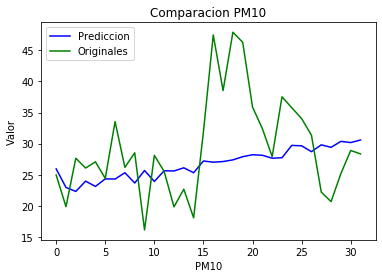

8.116022

In [28]:

rango_inferior =0
rango_superior =32
salida=ejecutar_prueba_modelo(dataOriginal[rango_inferior:rango_superior])
graficar_datos(salida, dataOriginalPM10.iloc[rango_inferior:rango_superior, 1].values)
rmse(salida, dataOriginalPM10.iloc[rango_inferior:rango_superior, 1].values)

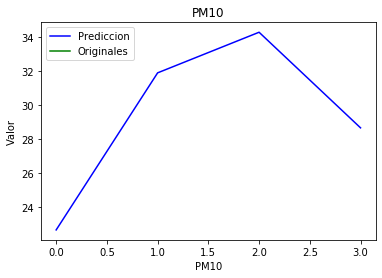

In [49]:

rango_inferior =31
rango_superior =35
salida=ejecutar_prueba_modelo(dataOriginal[rango_inferior:rango_superior])
graficar_datos(salida, dataOriginalPM10.iloc[rango_inferior:rango_superior, 1].values)


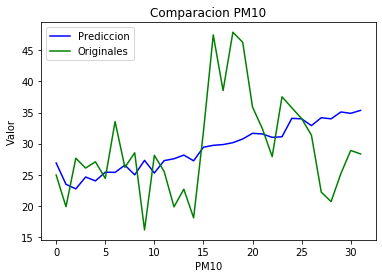

7.851671

In [29]:
rango_inferior =0
rango_superior =32
salida=ejecutar_prueba_modelo_pib(dataOriginal_bit[rango_inferior:rango_superior])
graficar_datos(salida, dataOriginalPM10.iloc[rango_inferior:rango_superior, 1].values)
rmse(salida, dataOriginalPM10.iloc[rango_inferior:rango_superior, 1].values)